In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
df_ratings = pd.read_csv("ml-latest-small/ratings.csv")

In [3]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [4]:
df_pivot = df_ratings.pivot(index="userId", columns="movieId", values="rating")

In [5]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 610 entries, 1 to 610
Columns: 9724 entries, 1 to 193609
dtypes: float64(9724)
memory usage: 45.3 MB


In [6]:
num_ratings = df_pivot.count().sum()
total_possible_pairs = df_pivot.shape[0] * df_pivot.shape[1]

sparsity = 1 - (num_ratings / total_possible_pairs)
sparsity

0.9830003169443864

In [7]:
# Count missing ratings per movie (columns)
missing_ratings_per_movie = df_pivot.isna().sum().sort_values(ascending=False)

# Count missing ratings per user (rows)
missing_ratings_per_user = df_pivot.isna().sum(axis=1).sort_values(ascending=False)

# Top 5 movies with most missing ratings
print("Movies with most missing ratings:")
print(missing_ratings_per_movie.head())

# Top 5 users with most missing ratings
print("\nUsers with most missing ratings:")
print(missing_ratings_per_user.head())

Movies with most missing ratings:
movieId
193609    609
56869     609
4032      609
57637     609
57526     609
dtype: int64

Users with most missing ratings:
userId
595    9704
207    9704
406    9704
189    9704
442    9704
dtype: int64


In [8]:
df_filled = df_pivot.apply(lambda row: row.fillna(row.mean()), axis=1)

In [9]:
min = df_filled.min().min() #first takes min for each film, second takes min between all films
max = df_filled.max().max()
min, max

(0.5, 5.0)

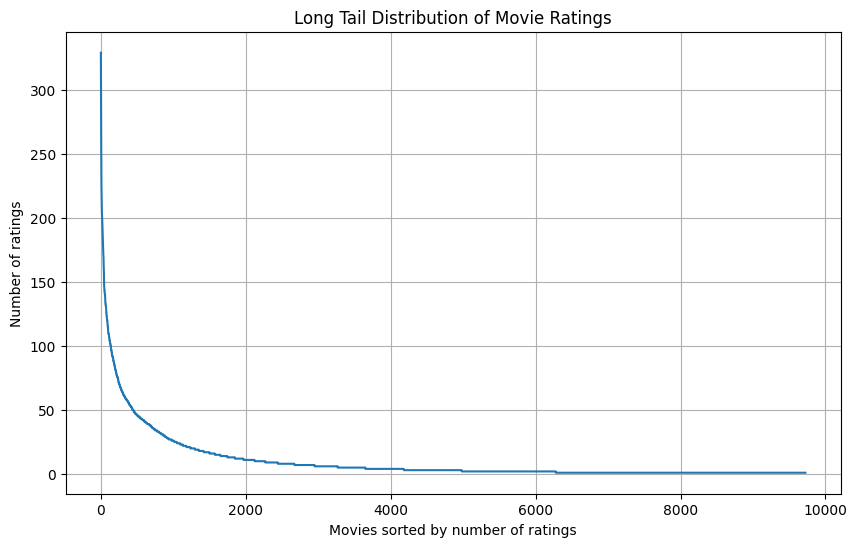

In [10]:
ratings_per_movie = df_pivot.count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.plot(ratings_per_movie.values)
plt.xlabel("Movies sorted by number of ratings")
plt.ylabel("Number of ratings")
plt.title("Long Tail Distribution of Movie Ratings")
plt.grid(True)
plt.show()

In [11]:
# Creiamo una lista di tuple (user_1, user_2, pearson_corr)
correlations = []

# Lista di utenti
users = df_pivot.index

# Ciclo su tutte le coppie di utenti
for i in range(len(users)):
    for j in range(i + 1, len(users)):
        user_1 = df_pivot.loc[users[i]]
        user_2 = df_pivot.loc[users[j]]

        # Trova i film valutati da entrambi
        common_movies = user_1.notna() & user_2.notna()
        ratings_1 = user_1[common_movies]
        ratings_2 = user_2[common_movies]

        # Calcola Pearson solo se ci sono almeno due valutazioni comuni
        if len(ratings_1) > 1:
            correlation, _ = pearsonr(ratings_1, ratings_2)
        else:
            correlation = None

        # Aggiungi il risultato
        correlations.append((users[i], users[j], correlation))

# Creiamo un DataFrame con le correlazioni
df_correlations = pd.DataFrame(correlations, columns=["user_1", "user_2", "pearson_corr"])

/tmp/ipykernel_95911/3749944051.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, _ = pearsonr(ratings_1, ratings_2)
